# Topic Modeling with Top2Vec

In [1]:
import pandas as pd
import numpy as np

In [395]:
viral = pd.read_csv('data/viral.csv', index_col=0)

In [396]:
viral = viral[viral['retweets'] >= 5]
viral = viral[viral['followers'] >= 5]

In [397]:
# Converting creation_time to datetime datatype
viral['creation_time'] = pd.to_datetime(viral['creation_time'])

In [398]:
viral['virality'] = viral['retweets'] / viral['followers'] # creating virality metric, which compares retweets to followers
viral['virality'] = ((viral['virality'] - np. min(viral['virality'])) 
                     / (np. max(viral['virality']) - np. min(viral['virality']))) # Normalizing Virality

In [408]:
viral.sort_values('virality', ascending=False)

,creation_time,user,tweet,retweets,favorites,followers,lists,virality
1050,2021-12-15 07:24:35+00:00,profeshkitten,"If you’re so smart, why aren’t you kind?",22951,105003,1453,22,1.000000
960,2022-07-29 01:32:17+00:00,keta_mean_,i'm so annoyed that 'vermilion' is a shade of ...,11510,144459,3363,22,0.216675
2483,2022-03-05 20:59:04+00:00,__init__main,@LegacyBuilder__ Merged the whole thread. http...,720,3873,251,2,0.181601
2551,2022-05-27 13:09:38+00:00,generativist,imagine being buried and then seeing a rat wit...,26923,215347,19877,347,0.085748
2380,2022-01-12 10:59:09+00:00,0x_Wick,"I knew it would come to this, Lets do this\n@I...",307,100,245,8,0.079328
...,...,...,...,...,...,...,...,...
3531,2020-06-23 12:41:15+00:00,Strategy_Gal,Looking for online networks to strengthen your...,5,25,140062,3305,0.000000
3550,2020-03-25 02:00:17+00:00,Strategy_Gal,For #AI enthusiasts &gt;&gt;\nXGBoost: A Deep ...,5,6,140062,3305,0.000000
3552,2020-03-18 02:00:17+00:00,Strategy_Gal,For #AI enthusiasts &gt;&gt;\nWhat's Stopping ...,5,8,140062,3305,0.000000
3562,2020-02-03 17:38:21+00:00,Strategy_Gal,Why is it that businesses around the world are...,5,10,140062,3305,0.000000


(3551, 8)

,creation_time,user,tweet,retweets,favorites,followers,lists,virality
0,2022-03-31 18:03:44+00:00,scrmshw,we don't have dreams we are dreams,6,52,1809,32,0.000208
1,2022-03-12 18:45:02+00:00,scrmshw,explain to me freedom without the use of the w...,5,151,1809,32,0.000173
2,2022-03-11 15:40:04+00:00,scrmshw,when we attempt to understand others we see th...,6,25,1809,32,0.000208


,retweets,favorites,followers,lists,virality
count,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000
mean,40.934385,347.201070,10188.290904,201.270065,0.001398
std,630.810416,4751.005661,24681.565291,502.296197,0.017849
min,5.000000,0.000000,34.000000,0.000000,0.000000
25%,7.000000,33.000000,1785.000000,23.000000,0.000073
50%,10.000000,70.000000,3709.000000,70.000000,0.000195
75%,18.000000,168.500000,8621.000000,175.000000,0.000563
max,26923.000000,215347.000000,140062.000000,3305.000000,1.000000



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3551 entries, 0 to 3720
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   creation_time  3551 non-null   datetime64[ns, UTC]
 1   user           3551 non-null   object             
 2   tweet          3551 non-null   object             
 3   retweets       3551 non-null   int64              
 4   favorites      3551 non-null   int64              
 5   followers      3551 non-null   int64              
 6   lists          3551 non-null   int64              
 7   virality       3551 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(2)
memory usage: 249.7+ KB


None

,retweets,favorites,followers,lists,virality
retweets,1.000000,0.946014,-0.004098,-0.006626,0.712515
favorites,0.946014,1.000000,-0.007310,-0.009829,0.531426
followers,-0.004098,-0.007310,1.000000,0.891008,-0.026516
lists,-0.006626,-0.009829,0.891008,1.000000,-0.026686
virality,0.712515,0.531426,-0.026516,-0.026686,1.000000


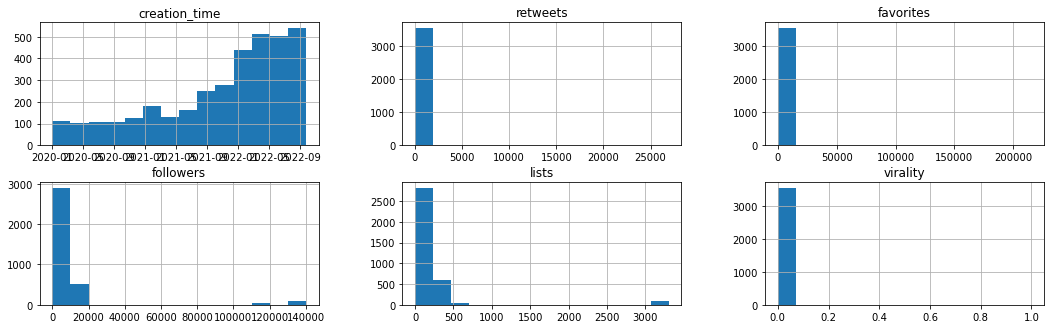

In [400]:
def EDA(df): # Creating a function to quickly do EDA
    display(df.shape)
    print()
    display(df.head(3))
    print()
    display(df.describe())
    print()
    display(df.info())
    print()
    df.hist(figsize=[18,14], bins=14, layout=[5, 3]);
    print()
    cor_plot = df.corr()
    display(cor_plot.style.background_gradient(cmap = 'RdYlGn'))

EDA(viral)

In [401]:
viral_docs = viral.tweet.tolist()

In [402]:
from top2vec import Top2Vec
import regex
# print(Top2Vec.__doc__) # Documentation

In [403]:
viral_docs = [d.replace("https", "") for d in viral_docs]
viral_docs = [d.replace("daysofcode", "") for d in viral_docs]
viral_docs = [d.replace(".co", "") for d in viral_docs]

In [404]:
min_ct_for_topic = int(len(viral_docs) / 700)
print(f"Min Occurrance Count: {min_ct_for_topic}")

model = Top2Vec(viral_docs, embedding_model='universal-sentence-encoder', min_count=min_ct_for_topic, workers=8, ngram_vocab=False, speed="deep-learn")

2022-09-24 19:09:29,255 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Min Occurrance Count: 5


C:\Users\8D\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-09-24 19:09:29,535 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-09-24 19:09:34,434 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-09-24 19:09:35,473 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-09-24 19:09:47,213 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-09-24 19:09:47,357 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [405]:
topic_sizes, topic_nums = model.get_topic_sizes()
print("Number of Topics: ",len(topic_nums))
print()
print(topic_sizes)

Number of Topics:  20

[746 387 351 263 217 168 155 148 130 128 125 119 108 103  89  79  68  67
  63  37]


In [406]:
topic_words, word_scores, topic_nums = model.get_topics()

def examine_topic(topic):
    print('Main Keywords:')
    print(topic_words[topic])
    print('----------')
    print('Keyword Importance:')
    print(word_scores[topic]) # Look at word scores by topic
    print('----------')
    print('Sample Tweets:')
    print('----------')
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic, num_docs=5)
    for doc, score, doc_id in zip(documents, document_scores, document_ids):
        print(f"### Document: {doc_id}, Score: {score} ###")
        print(doc)
        print('----------')

In [407]:
# Examine all topics
for words, scores, num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f"Topic Keywords: {words}")

# examine_topic(0) # Examine specific topic

0
Topic Keywords: ['mindset' 'therapy' 'emotional' 'ignore' 'realize' 'become' 'dukkha'
 'altruism' 'empathy' 'psychological' 'learned' 'understand' 'emotion'
 'imo' 'yourself' 'forget' 'conscious' 'virtue' 'loving' 'emotions'
 'relationships' 'be' 'deep' 'meditation' 'feelings' 'mental' 'ego'
 'being' 'accept' 'bullshit' 'truly' 'seriously' 'conditioned' 'trust'
 'love' 'feels' 'respect' 'inner' 'sad' 'dont' 'principles' 'shut'
 'principle' 'grow' 'self' 'feeling' 'harm' 'awareness' 'hate' 'suffering']
1
Topic Keywords: ['omg' 'wtf' 'fuck' 'cringe' 'lol' 'reminder' 'wow' 'lmao' 'damn' 'shame'
 'ocsbmath' 'ha' 'normies' 'woke' 'fucking' 'funny' 'silly' 'knows'
 'feels' 'fail' 'echofirst' 'deeplearning' 'deserves' 'discuss' 'subtle'
 'seriously' 'explains' 'mursd' 'jkxxtfu' 'worst' 'seemingly' 'vibes'
 'nyt' 'dflow' 'shit' 'insane' 'dear' 'datastrategy' 'drericding'
 'brilliant' 'ignore' 'vibecamp' 'thoughts' 'sad' 'episode' 'forgot'
 'midjourney' 'epic' 'lore' 'weird']
2
Topic Keywords

In [409]:
# Individual Tweet Lookup
def tweet_topic_lookup(tweet_int):
    display(viral.iloc[[tweet_int]].style.set_properties(**{'text-align': 'left'})) # Testing document correlation with DF by looking up tweets
    display(model.get_documents_topics([tweet_int])[1]) # Look at top2vec confidence of single tweet
    display(model.get_documents_topics([tweet_int])[2]) # Look at top2vec topic keywords compared to a single tweet

tweet_topic_lookup(1700)

,creation_time,user,tweet,retweets,favorites,followers,lists,virality
1766,2022-07-13 15:11:56+00:00,RandomSprint,Mr. Smith has two children. At least one of them is a boy. What is the probability both are boys?,12,236,514,4,0.001476


array([0.13708627], dtype=float32)

array([['conservative', 'democratic', 'election', 'political',
        'government', 'brexit', 'mp', 'trump', 'russia', 'revolution',
        'police', 'ukrainian', 'nyt', 'report', 'national',
        'independent', 'radical', 'anti', 'bullshit', 'campaign',
        'resistance', 'absolute', 'doctorow', 'seems', 'reporter',
        'fuck', 'nation', 'based', 'johnson', 'rule', 'seriously',
        'ethical', 'freedom', 'eu', 'systemic', 'lol', 'hear', 'rights',
        'policy', 'so', 'leave', 'really', 'russian', 'ethics',
        'pierson', 'consequences', 'abuse', 'remain', 'wtf', 'said']],
      dtype='<U15')

In [410]:
# for loop - look up each document and append the topic ID to the original dataframe
topic_ids = []
for doc in model.document_ids: # model.document_ids # List of all document IDs
    # model.get_documents_topics([doc])[1][0] # Grabbing Confidence
    topic_ids.append(model.get_documents_topics([doc])[0][0]) # Grabbing Topic ID
viral['topic'] = topic_ids

In [411]:
viral.sample(20).style.set_properties(**{'text-align': 'left'})

,creation_time,user,tweet,retweets,favorites,followers,lists,virality,topic
1731,2020-11-16 08:21:34+00:00,VanGennepD,"@BillHanage You probably know, but others might not: Sweden is one of the only countries on OurWorldInData that has a deaths vs time curve shown by date of death. So, they always have an artificial drop at the end due to incomplete data. A great alternative: https://t.co/IiTcHl5NZb",9,38,1785,57,0.000317,7
1667,2022-01-26 23:41:10+00:00,VanGennepD,@K_G_Andersen @Spotify I'm not sure censoring comedians because they disagree with us about medical issues is the best way forward. Should we have censored the WHO when they spread dangerous misinformation about how covid is transmitted? How about when Fauci/SG told us to not wear masks?,6,175,1785,57,0.000211,7
3502,2021-02-14 05:21:23+00:00,Strategy_Gal,"[Panel Discussion] SiliconAngle #GDPR at IBM Fast Track Your Data Lillian Pierson, PE discusses GDPR with SiliconAngle at IBM Fast Track Your Data 2017 in Munich, Germany. #AI #startups #data https://t.co/kOs0lmx0ys",6,2,140062,3305,0.000000,11
398,2022-05-23 03:20:55+00:00,smallkewlhuman,me three years ago: thoughts that arise during meditation are just distractions that need to be ignored me now: thoughts that arise during meditation are probably suppressed parts of you that need to be listened to,12,164,2516,20,0.000300,0
1194,2020-11-28 19:58:10+00:00,_StevenFan,"My wife told me not to become a cult leader. I laughed, she laughed, my acolytes laughed.",13,217,2517,50,0.000325,1
2873,2022-07-17 00:41:22+00:00,chercher_ai,the square as seen by the sphere in the novel flatland by Edward Abbott https://t.co/TslSCo63Nz,6,20,3288,65,0.000113,5
3660,2022-06-06 09:15:32+00:00,Sys_innovation,"The Three Horizon model helps us think about how transition processes evolve by looking at the driving forces of innovation, declining incumbent systems, & the emergence of a new paradigm. Find the full guide here: https://t.co/vMBtnWZfLj Workshop canvas: https://t.co/fVZyGY4QKl https://t.co/MsTNvEgesv",9,22,15528,373,0.000034,6
2078,2021-02-14 21:52:17+00:00,unrealdeveloper,I love twitter. https://t.co/YOSgXQgXA8 https://t.co/FAPN96pSTo,7,30,1095,16,0.000402,9
1332,2022-06-19 21:51:43+00:00,alyssamvance,"Many things seen as ""traditional"" have origins in the late 19th or 20th century, and were uncommon or unknown for most of history. (From Pragmatists' Guide to Relationships) https://t.co/u7WsdY6Izi",12,71,3619,39,0.000208,5
2620,2021-09-24 22:49:23+00:00,generativist,Most important idea I encountered this week. Something like Ship of Theseus as Ship It! praxis. https://t.co/gzcNzJFqSE,8,48,19877,347,0.000023,2


In [415]:
examine_topic(3)

Main Keywords:
['convention' 'participate' 'podcast' 'amp' 'conference' 'workshop'
 'meeting' 'project' 'discussing' 'introduction' 'workshops' 'protocol'
 'participation' 'join' 'involved' 'joining' 'stage' 'conceptual'
 'whether' 'presentation' 'bioinformatics' 'yo' 'meet' 'projects' 'talks'
 'study' 'event' 'cmr' 'planning' 'lets' 'learned' 'transhumanism' 'so'
 'based' 'consider' 'lab' 'understand' 'is' 'productive' 'computational'
 'follow' 'diffusion' 'happening' 'tomorrow' 'theory' 'invite' 'set'
 'decided' 'implementation' 'let']
----------
Keyword Importance:
[0.21507251 0.21091515 0.2028815  0.20047984 0.19890217 0.18894419
 0.18868196 0.18696268 0.18274719 0.1819355  0.17637148 0.17410746
 0.17403282 0.17286347 0.17274928 0.169478   0.16902745 0.1680805
 0.1639872  0.16296697 0.16150205 0.15715365 0.15676206 0.15647958
 0.15345412 0.15343854 0.15223262 0.1515453  0.15106876 0.15035146
 0.14959775 0.14943042 0.1485849  0.1483067  0.14701098 0.14662193
 0.14655359 0.1461441  0

# Repeating our pipeline with nonviral tweets
(Tweets with less than 5 retweets)

In [489]:
# Load Data
normal = pd.read_csv('data/samples.csv', index_col=0)

# Drop tweets with over 5 retweets, and tweets from accounts with almost no followers
normal = normal[normal['retweets'] <= 5]
normal = normal[normal['followers'] >= 5]

# Convert creation_time to datetime format
normal['creation_time'] = pd.to_datetime(normal['creation_time'])

# Reset index to fill in dropped rows
normal = normal.reset_index()

# Drop duplicate index column
normal.drop('index', axis=1)

,creation_time,user,tweet,retweets,favorites,followers,lists
0,2022-09-23 07:30:12+00:00,goannaburrows,"The VC is ""pleased to advise"" that next year t...",0,7,566,7
1,2022-09-16 00:18:55+00:00,goannaburrows,Reminder: Feedback on the proposal for a natio...,1,1,566,7
2,2022-09-15 07:47:58+00:00,goannaburrows,Yesterday I had an embarrassing moment that I ...,0,5,566,7
3,2022-09-14 07:28:49+00:00,goannaburrows,Today a news editor told me that 'biodiversity...,0,8,566,7
4,2022-09-13 03:40:24+00:00,goannaburrows,Writing productivity tip: type in a heinous fo...,0,8,566,7
...,...,...,...,...,...,...,...
14323,2022-07-06 09:16:37+00:00,mufeedvh,have been following this project for quite som...,0,2,462,4
14324,2022-06-13 18:41:10+00:00,mufeedvh,Okay so today's that day hmm... so I actually ...,0,4,462,4
14325,2022-05-05 17:15:01+00:00,mufeedvh,+200 stars in two days out of nowhere?! What's...,0,5,462,4
14326,2020-05-13 16:49:16+00:00,mufeedvh,today was an epic day.,0,6,462,4


(14328, 8)

,index,creation_time,user,tweet,retweets,favorites,followers,lists
0,0,2022-09-23 07:30:12+00:00,goannaburrows,"The VC is ""pleased to advise"" that next year t...",0,7,566,7
1,1,2022-09-16 00:18:55+00:00,goannaburrows,Reminder: Feedback on the proposal for a natio...,1,1,566,7
2,2,2022-09-15 07:47:58+00:00,goannaburrows,Yesterday I had an embarrassing moment that I ...,0,5,566,7


,index,retweets,favorites,followers,lists
count,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000
mean,7535.221803,0.298995,6.432649,1189.516471,28.770729
std,4316.321191,0.805470,15.153423,2020.100973,63.704553
min,0.000000,0.000000,0.000000,5.000000,0.000000
25%,3768.750000,0.000000,0.000000,148.000000,2.000000
50%,7642.500000,0.000000,2.000000,358.000000,6.000000
75%,11288.250000,0.000000,6.000000,1147.000000,24.000000
max,14946.000000,5.000000,319.000000,15528.000000,424.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14328 entries, 0 to 14327
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   index          14328 non-null  int64              
 1   creation_time  14328 non-null  datetime64[ns, UTC]
 2   user           14328 non-null  object             
 3   tweet          14328 non-null  object             
 4   retweets       14328 non-null  int64              
 5   favorites      14328 non-null  int64              
 6   followers      14328 non-null  int64              
 7   lists          14328 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(2)
memory usage: 895.6+ KB


None

,index,retweets,favorites,followers,lists
index,1.000000,-0.042809,-0.006914,0.046530,0.037189
retweets,-0.042809,1.000000,0.467247,0.283896,0.193292
favorites,-0.006914,0.467247,1.000000,0.266878,0.114705
followers,0.046530,0.283896,0.266878,1.000000,0.825148
lists,0.037189,0.193292,0.114705,0.825148,1.000000


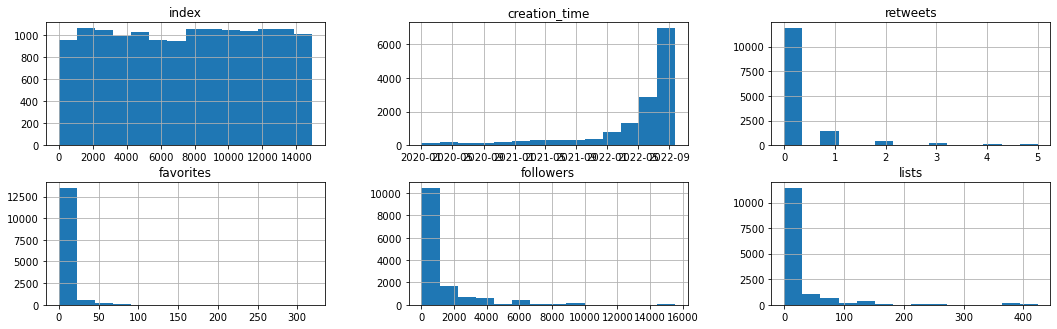

In [490]:
EDA(normal)

In [491]:
# Creating virality column & normalizing
normal['virality'] = normal['retweets'] / normal['followers'] # creating virality metric, which compares retweets to followers
normal['virality'] = ((normal['virality'] - np. min(normal['virality'])) 
                     / (np. max(normal['virality']) - np. min(normal['virality']))) # Normalizing Virality

In [492]:
normal.sort_values('virality', ascending=False)

,index,creation_time,user,tweet,retweets,favorites,followers,lists,virality
3965,4172,2021-12-25 04:24:14+00:00,nooooowayyyyman,I'm her little guy,5,21,12,1,1.0
3966,4173,2021-12-22 17:11:21+00:00,nooooowayyyyman,tired: breaking up over text \n\nwired: propos...,4,18,12,1,0.8
3967,4174,2021-12-20 02:59:12+00:00,nooooowayyyyman,so Alvin and the chipmunks are slaves right,3,21,12,1,0.6
993,1104,2022-09-16 04:26:45+00:00,cekaur,There are all sorts of cool fellowships for hi...,1,5,6,0,0.4
3969,4176,2021-12-18 19:57:56+00:00,nooooowayyyyman,would have thousands more followers if I just ...,2,10,12,1,0.4
...,...,...,...,...,...,...,...,...,...
5400,5655,2020-10-02 14:20:09+00:00,iknowidontknow,Wegen Anstand und so https://t.co/knFejALlZN,0,0,61,2,0.0
5401,5656,2020-08-25 06:32:11+00:00,iknowidontknow,The best is yet to come? https://t.co/burnaCu0K5,0,0,61,2,0.0
5402,5657,2020-06-20 18:13:24+00:00,iknowidontknow,Make british potatoes great again https://t.co...,0,0,61,2,0.0
5403,5658,2020-06-16 08:08:50+00:00,iknowidontknow,What happened to Al Gore? Why isn't he running...,0,0,61,2,0.0


In [493]:
# Document List Creation
normal_docs = normal.tweet.tolist()

In [494]:
# Document List Cleaning
normal_docs = [d.replace("https", "") for d in normal_docs]
normal_docs = [d.replace("daysofcode", "") for d in normal_docs]
normal_docs = [d.replace(".co", "") for d in normal_docs]

In [495]:
# Model Parameters
min_ct_for_topic = int(len(normal_docs) / 700)
print(f"Min Occurrance Count: {min_ct_for_topic}")

# Model Training
model_normal = Top2Vec(normal_docs, embedding_model='universal-sentence-encoder', min_count=min_ct_for_topic, workers=8, ngram_vocab=False, speed="deep-learn")

2022-09-24 22:58:01,493 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Min Occurrance Count: 20


C:\Users\8D\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-09-24 22:58:02,283 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-09-24 22:58:07,165 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-09-24 22:58:10,633 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-09-24 22:58:18,186 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-09-24 22:58:18,966 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [498]:
# Peek topic length & distribution
topic_sizes, topic_nums = model_normal.get_topic_sizes()
print("Number of Topics: ",len(topic_nums))
print()
print(topic_sizes)

Number of Topics:  81

[1557  437  434  426  423  367  349  333  308  292  291  286  286  251
  251  241  239  238  231  226  225  221  214  205  205  201  200  189
  179  178  177  168  167  160  152  147  144  142  136  131  126  123
  116  113  111  111  108  106  103  101   98   95   92   90   89   87
   87   84   82   82   81   81   75   74   73   73   71   69   68   68
   65   63   63   61   59   55   53   52   48   37   28]


In [499]:
# Extract topic data
topic_words, word_scores, topic_nums = model_normal.get_topics()

def examine_topic(topic, model):
    print('Main Keywords:')
    print(topic_words[topic])
    print('----------')
    print('Keyword Importance:')
    print(word_scores[topic]) # Look at word scores by topic
    print('----------')
    print('Sample Tweets:')
    print('----------')
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic, num_docs=5)
    for doc, score, doc_id in zip(documents, document_scores, document_ids):
        print(f"### Document: {doc_id}, Score: {score} ###")
        print(doc)
        print('----------')

In [500]:
# Examine all topics
for words, scores, num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f"Topic Keywords: {words}")

0
Topic Keywords: ['therapy' 'realize' 'qualia' 'emotional' 'understand' 'learned'
 'meditation' 'behavior' 'principles' 'imo' 'genuinely' 'truly' 'feelings'
 'conscious' 'huh' 'emotions' 'awareness' 'understanding' 'feels' 'become'
 'accept' 'feel' 'inner' 'concept' 'deep' 'reality' 'philosophy' 'quite'
 'consciousness' 'dont' 'approach' 'opposite' 'respect' 'truth' 'mental'
 'meaning' 'deeply' 'agree' 'realizing' 'vibes' 'rather' 'tbh' 'meme'
 'being' 'said' 'consider' 'self' 'within' 'feeling' 'appreciate']
1
Topic Keywords: ['tweets' 'twitter' 'tweet' 'followers' 'followed' 'podcast' 'irl' 'lmao'
 'fuck' 'lol' 'tbh' 'shit' 'sad' 'damn' 'blog' 'haha' 'woke' 'fan'
 'cringe' 'funny' 'youtube' 'wtf' 'tl' 'til' 'laugh' 'news' 'anti' 'glad'
 'discourse' 'episode' 'google' 'literally' 'follow' 'content' 'genuinely'
 'seems' 'trump' 'seriously' 'lately' 'wow' 'meta' 'response' 'reminder'
 'media' 'guess' 'thank' 'based' 'noticed' 'talks' 'conversation']
2
Topic Keywords: ['lol' 'lmao' 'hah

In [503]:
examine_topic(0, model_normal) # Examine specific topic

Main Keywords:
['therapy' 'realize' 'qualia' 'emotional' 'understand' 'learned'
 'meditation' 'behavior' 'principles' 'imo' 'genuinely' 'truly' 'feelings'
 'conscious' 'huh' 'emotions' 'awareness' 'understanding' 'feels' 'become'
 'accept' 'feel' 'inner' 'concept' 'deep' 'reality' 'philosophy' 'quite'
 'consciousness' 'dont' 'approach' 'opposite' 'respect' 'truth' 'mental'
 'meaning' 'deeply' 'agree' 'realizing' 'vibes' 'rather' 'tbh' 'meme'
 'being' 'said' 'consider' 'self' 'within' 'feeling' 'appreciate']
----------
Keyword Importance:
[0.25517172 0.2531742  0.23181039 0.2191494  0.21836704 0.21617733
 0.21594903 0.21372601 0.21175233 0.20947087 0.20776382 0.20590211
 0.20559825 0.20440626 0.20321438 0.20274934 0.1995793  0.19841231
 0.1976365  0.1948845  0.1947783  0.19301188 0.19215746 0.18961503
 0.18948276 0.1882047  0.18711288 0.1864619  0.18628103 0.18613327
 0.18549912 0.18544084 0.18459724 0.18440154 0.18336056 0.18271255
 0.18106578 0.18101847 0.18089911 0.17956845 0.1793725

In [504]:
# Individual Tweet Lookup
def tweet_topic_lookup(tweet_int, model, data):
    display(data.iloc[[tweet_int]].style.set_properties(**{'text-align': 'left'})) # Testing document correlation with DF by looking up tweets
    display(model.get_documents_topics([tweet_int])[1]) # Look at top2vec confidence of single tweet
    display(model.get_documents_topics([tweet_int])[2]) # Look at top2vec topic keywords compared to a single tweet

tweet_topic_lookup(9884, model_normal, normal)

,index,creation_time,user,tweet,retweets,favorites,followers,lists,virality
9884,10399,2022-07-23 22:41:04+00:00,chenchenLiu11,"And the fact is that if @QiaochuYuan did not nudge me to start using tweet the other day and gave me some tips, I would not enjoy tweeting sooo much! Thank you @QiaochuYuan. Haha, my twitter master for sure! https://t.co/ydFKpllVTt",0,7,141,2,0.000000


array([0.71144617], dtype=float32)

array([['tweets', 'twitter', 'tweet', 'followers', 'followed', 'podcast',
        'irl', 'lmao', 'fuck', 'lol', 'tbh', 'shit', 'sad', 'damn',
        'blog', 'haha', 'woke', 'fan', 'cringe', 'funny', 'youtube',
        'wtf', 'tl', 'til', 'laugh', 'news', 'anti', 'glad', 'discourse',
        'episode', 'google', 'literally', 'follow', 'content',
        'genuinely', 'seems', 'trump', 'seriously', 'lately', 'wow',
        'meta', 'response', 'reminder', 'media', 'guess', 'thank',
        'based', 'noticed', 'talks', 'conversation']], dtype='<U15')

In [506]:
# for loop - look up each document and append the topic ID to the original dataframe
topic_ids = []
topic_confidence = []
for doc in model_normal.document_ids: # model.document_ids # List of all document IDs
    topic_confidence.append(model_normal.get_documents_topics([doc])[1][0]) # Grabbing Confidence
    topic_ids.append(model_normal.get_documents_topics([doc])[0][0]) # Grabbing Topic ID
normal['topic'] = topic_ids
normal['confidence'] = topic_confidence

In [508]:
normal.sample(20).style.set_properties(**{'text-align': 'left'})

,index,creation_time,user,tweet,retweets,favorites,followers,lists,virality,topic,confidence
5813,6169,2022-09-02 05:00:40+00:00,increase_la,"The ""natural"" price something cost is the first price you remember encountering for that thing. Inflation makes the cost of things more and more imaginary as you age. It all seems like made up nonsense. To me a cookie-time always cost $1. Gold fixes this.",0,6,426,11,0.000000,0,0.288233
2822,2955,2022-09-22 17:56:24+00:00,malaphorician,"You know what, I do love myself. I'm great actually. Some parts of me are broken, but I love my limp. I respect it/myself",0,7,335,0,0.000000,8,0.643605
10645,11188,2022-06-28 16:10:38+00:00,vincent_yc_li,"yes! in fact, i think contextual changes demand different behaviours - being logically consistent across all situations might not actually make sense as a way of being https://t.co/vwO69jacgi",0,0,383,8,0.000000,0,0.474500
7861,8350,2022-05-28 22:17:02+00:00,contrarianhype,Fuck yeeeessssss !!!!!!,0,1,147,0,0.000000,2,0.575323
13554,14120,2022-09-23 18:26:48+00:00,RandomSprint,"I tried texting my wife the Adam Levine DM. After the first message, I heard her yell ""What?"" After the second message, she said ""Are you okay?"" and started running to my office. https://t.co/8CgUWdtJNW",0,29,514,4,0.000000,27,0.429252
14211,14828,2022-07-26 06:27:42+00:00,bunbury_exe,*moves to sf* https://t.co/jGQNAK7Ygo,0,3,235,5,0.000000,34,0.357287
7684,8173,2020-05-01 14:38:33+00:00,SimplexityMind,Why are we still seeing random shortages at the supermarket? The answer may surprise you https://t.co/GVALfMEnKu #complexity,0,0,117,4,0.000000,22,0.426605
2569,2701,2020-01-11 08:12:44+00:00,skullpile5,i can tell im bored of a game when i start trying to write bots for it,1,3,113,5,0.021239,1,0.349172
5834,6190,2022-07-26 04:16:28+00:00,increase_la,Never forget what they took from us https://t.co/XacpahHxVS,0,3,426,11,0.000000,9,0.226427
2385,2510,2022-09-19 00:02:07+00:00,biomonika,Are there any Czech-speaking families with kids in Santa Cruz/San Jose/San Francisco area on my Twitter network? https://t.co/cqFWxMY8tp,1,0,1419,30,0.001691,34,0.456652


In [532]:
examine_topic(19, model_normal)

Main Keywords:
['conference' 'bioinformatics' 'meeting' 'talks' 'rsvp' 'podcast' 'lab'
 'ml' 'meet' 'join' 'event' 'excited' 'session' 'involved' 'based'
 'virtual' 'presenting' 'stage' 'eth' 'discourse' 'interview' 'pm' 'thank'
 'gt' 'present' 'interest' 'welcome' 'project' 'conversations' 'bio' 'met'
 'consider' 'vr' 'im' 'tomorrow' 'hi' 'neural' 'interested' 'yo' 'subject'
 'rn' 'third' 'whether' 'group' 'meme' 'understand' 'prompt' 'may'
 'approach' 'is']
----------
Keyword Importance:
[0.25427768 0.22408517 0.2177417  0.21500543 0.20966233 0.1905209
 0.18942328 0.18780428 0.18656984 0.17805743 0.16704598 0.1649026
 0.16220924 0.16061968 0.15694992 0.15456474 0.15306057 0.15077358
 0.14813568 0.1478126  0.14688459 0.14611268 0.14606944 0.14582953
 0.14509329 0.14435765 0.14403096 0.14302564 0.14225414 0.141177
 0.14060003 0.13933666 0.13851623 0.13748237 0.1367389  0.13249303
 0.13140656 0.13117218 0.13057882 0.12949549 0.12906346 0.12885383
 0.12836027 0.12654106 0.12626405 0.1258

In [515]:
dummies = normal.drop('topic', axis=1)

In [527]:
dummies = pd.get_dummies(normal['topic'])
dummies = normal.join(dummies)
dummies = dummies.drop('topic', axis=1)

In [531]:
df = dummies
display(df.shape)
print()
display(df.head(3))
print()
display(df.describe())
print()
display(df.info())
print()
cor_plot = df.corr()
display(cor_plot.style.background_gradient(cmap = 'RdYlGn'))

(14328, 91)

,index,creation_time,user,tweet,retweets,favorites,followers,lists,virality,confidence,...,71,72,73,74,75,76,77,78,79,80
0,0,2022-09-23 07:30:12+00:00,goannaburrows,"The VC is ""pleased to advise"" that next year t...",0,7,566,7,0.00000,0.410583,...,0,0,0,0,0,0,0,0,0,0
1,1,2022-09-16 00:18:55+00:00,goannaburrows,Reminder: Feedback on the proposal for a natio...,1,1,566,7,0.00424,0.236398,...,0,0,0,0,0,0,0,0,0,0
2,2,2022-09-15 07:47:58+00:00,goannaburrows,Yesterday I had an embarrassing moment that I ...,0,5,566,7,0.00000,0.403140,...,0,0,0,0,0,0,0,0,0,0


,index,retweets,favorites,followers,lists,virality,confidence,0,1,2,...,71,72,73,74,75,76,77,78,79,80
count,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,...,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000
mean,7535.221803,0.298995,6.432649,1189.516471,28.770729,0.001934,0.395331,0.108668,0.030500,0.030290,...,0.004397,0.004397,0.004257,0.004118,0.003839,0.003699,0.003629,0.003350,0.002582,0.001954
std,4316.321191,0.805470,15.153423,2020.100973,63.704553,0.017400,0.122850,0.311234,0.171964,0.171391,...,0.066166,0.066166,0.065112,0.064040,0.061840,0.060709,0.060136,0.057785,0.050753,0.044165
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.093784,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3768.750000,0.000000,0.000000,148.000000,2.000000,0.000000,0.308391,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7642.500000,0.000000,2.000000,358.000000,6.000000,0.000000,0.376875,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11288.250000,0.000000,6.000000,1147.000000,24.000000,0.000000,0.463350,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14946.000000,5.000000,319.000000,15528.000000,424.000000,1.000000,0.998737,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14328 entries, 0 to 14327
Data columns (total 91 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   index          14328 non-null  int64              
 1   creation_time  14328 non-null  datetime64[ns, UTC]
 2   user           14328 non-null  object             
 3   tweet          14328 non-null  object             
 4   retweets       14328 non-null  int64              
 5   favorites      14328 non-null  int64              
 6   followers      14328 non-null  int64              
 7   lists          14328 non-null  int64              
 8   virality       14328 non-null  float64            
 9   confidence     14328 non-null  float32            
 10  0              14328 non-null  uint8              
 11  1              14328 non-null  uint8              
 12  2              14328 non-null  uint8              
 13  3              14328 non-null  uint8         

None

# Running our Top2Vec Pipeline on both datasets

In [554]:
# Load Normal Tweets
normal = pd.read_csv('data/samples.csv', index_col=0)

# Drop tweets with over 5 retweets, and tweets from accounts with almost no followers
normal = normal[normal['retweets'] <= 5]
normal = normal[normal['followers'] >= 5]

# Convert creation_time to datetime format
normal['creation_time'] = pd.to_datetime(normal['creation_time'])

# Reset index to fill in dropped rows
normal = normal.reset_index()

# Drop duplicate index column
normal = normal.drop('index', axis=1)

normal['viral'] = 0

In [555]:
normal.head(5)

,creation_time,user,tweet,retweets,favorites,followers,lists,viral
0,2022-09-23 07:30:12+00:00,goannaburrows,"The VC is ""pleased to advise"" that next year t...",0,7,566,7,0
1,2022-09-16 00:18:55+00:00,goannaburrows,Reminder: Feedback on the proposal for a natio...,1,1,566,7,0
2,2022-09-15 07:47:58+00:00,goannaburrows,Yesterday I had an embarrassing moment that I ...,0,5,566,7,0
3,2022-09-14 07:28:49+00:00,goannaburrows,Today a news editor told me that 'biodiversity...,0,8,566,7,0
4,2022-09-13 03:40:24+00:00,goannaburrows,Writing productivity tip: type in a heinous fo...,0,8,566,7,0


In [561]:
viral = pd.read_csv('data/viral.csv', index_col=0)

In [562]:
# 
viral = viral[viral['retweets'] >= 5]
viral = viral[viral['followers'] >= 5]

# Reset index to fill in dropped rows
viral = viral.reset_index()

# Drop duplicate index column
viral = viral.drop('index', axis=1)

# Adding Viral Label
viral['viral'] = 1

In [563]:
# Converting creation_time to datetime datatype
viral['creation_time'] = pd.to_datetime(viral['creation_time'])

In [564]:
# # creating virality metric, which compares retweets to followers
# viral['virality'] = viral['retweets'] / viral['followers'] # creating virality metric, which compares retweets to followers

# # Normalizing Virality
# viral['virality'] = ((viral['virality'] - np. min(viral['virality'])) 
#                      / (np. max(viral['virality']) - np. min(viral['virality'])))

In [570]:
# combining viral and non-viral data
data = normal.append(viral)

# Reset index to fill in dropped rows
data = data.reset_index()

# Drop duplicate index column
data = data.drop('index', axis=1)

(17879, 8)

,creation_time,user,tweet,retweets,favorites,followers,lists,viral
0,2022-09-23 07:30:12+00:00,goannaburrows,"The VC is ""pleased to advise"" that next year t...",0,7,566,7,0
1,2022-09-16 00:18:55+00:00,goannaburrows,Reminder: Feedback on the proposal for a natio...,1,1,566,7,0
2,2022-09-15 07:47:58+00:00,goannaburrows,Yesterday I had an embarrassing moment that I ...,0,5,566,7,0


,retweets,favorites,followers,lists,viral
count,17879.000000,17879.000000,17879.000000,17879.000000,17879.000000
mean,8.369707,74.113653,2976.789138,63.031322,0.198613
std,281.563342,2121.498832,11709.975848,241.013740,0.398967
min,0.000000,0.000000,5.000000,0.000000,0.000000
25%,0.000000,1.000000,169.000000,2.000000,0.000000
50%,0.000000,3.000000,588.000000,9.000000,0.000000
75%,2.000000,17.000000,2261.000000,47.000000,0.000000
max,26923.000000,215347.000000,140062.000000,3305.000000,1.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   creation_time  17879 non-null  datetime64[ns, UTC]
 1   user           17879 non-null  object             
 2   tweet          17879 non-null  object             
 3   retweets       17879 non-null  int64              
 4   favorites      17879 non-null  int64              
 5   followers      17879 non-null  int64              
 6   lists          17879 non-null  int64              
 7   viral          17879 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(2)
memory usage: 1.1+ MB


None

,retweets,favorites,followers,lists,viral
retweets,1.000000,0.946179,0.013923,0.010416,0.057579
favorites,0.946179,1.000000,0.013060,0.009363,0.064085
followers,0.013923,0.013060,1.000000,0.894887,0.306595
lists,0.010416,0.009363,0.894887,1.000000,0.285550
viral,0.057579,0.064085,0.306595,0.285550,1.000000


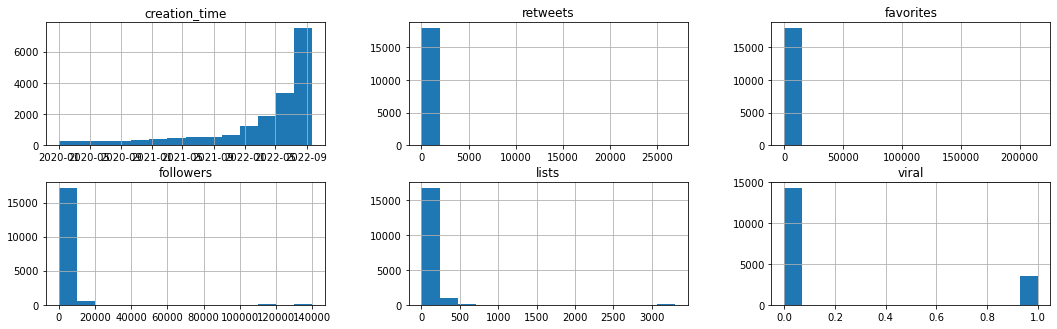

In [572]:
EDA(data)

In [573]:
# Creating virality column & normalizing
data['virality'] = data['retweets'] / data['followers'] # creating virality metric, which compares retweets to followers
data['virality'] = ((data['virality'] - np. min(data['virality'])) 
                     / (np. max(data['virality']) - np. min(data['virality']))) # Normalizing Virality

In [574]:
data.sort_values('virality', ascending=False)

,creation_time,user,tweet,retweets,favorites,followers,lists,viral,virality
15341,2021-12-15 07:24:35+00:00,profeshkitten,"If you’re so smart, why aren’t you kind?",22951,105003,1453,22,1,1.000000
15253,2022-07-29 01:32:17+00:00,keta_mean_,i'm so annoyed that 'vermilion' is a shade of ...,11510,144459,3363,22,1,0.216677
16710,2022-03-05 20:59:04+00:00,__init__main,@LegacyBuilder__ Merged the whole thread. http...,720,3873,251,2,1,0.181603
16772,2022-05-27 13:09:38+00:00,generativist,imagine being buried and then seeing a rat wit...,26923,215347,19877,347,1,0.085750
16611,2022-01-12 10:59:09+00:00,0x_Wick,"I knew it would come to this, Lets do this\n@I...",307,100,245,8,1,0.079330
...,...,...,...,...,...,...,...,...,...
6592,2020-01-23 14:57:57+00:00,Jeyanbiomimic,Why water is less high on political agenda the...,0,1,921,24,0,0.000000
6593,2020-01-02 05:44:33+00:00,Jeyanbiomimic,Story of #Chennai. Pioneering move by Chennai ...,0,4,921,24,0,0.000000
6594,2022-09-12 17:11:20+00:00,mZargham,short this algo-meta-stable into a new basin o...,0,3,5305,234,0,0.000000
6596,2022-08-30 22:18:52+00:00,mZargham,A technologically empowered *Mutualism* (movem...,0,7,5305,234,0,0.000000


In [575]:
# Document List Creation
docs = data.tweet.tolist()

In [576]:
# Document List Cleaning
docs = [d.replace("https", "") for d in docs]
docs = [d.replace("daysofcode", "") for d in docs]
docs = [d.replace(".co", "") for d in docs]

In [577]:
# Model Parameters
min_ct_for_topic = int(len(docs) / 700)
print(f"Min Occurrance Count: {min_ct_for_topic}")

# Model Training
model = Top2Vec(docs, embedding_model='universal-sentence-encoder', min_count=min_ct_for_topic, workers=8, ngram_vocab=False, speed="deep-learn")

2022-09-24 23:32:42,335 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Min Occurrance Count: 25


C:\Users\8D\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-09-24 23:32:43,395 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-09-24 23:32:48,325 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-09-24 23:32:52,992 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-09-24 23:32:59,143 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-09-24 23:33:01,342 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [578]:
# Peek topic length & distribution
topic_sizes, topic_nums = model.get_topic_sizes()
print("Number of Topics: ",len(topic_nums))
print()
print(topic_sizes)

Number of Topics:  99

[1483  746  527  482  478  445  413  401  325  319  317  314  308  307
  302  298  298  295  295  273  271  267  247  239  234  234  223  215
  208  193  192  191  186  180  179  172  171  171  166  157  149  142
  138  128  125  123  122  121  121  115  114  113  112  105  105  104
  103  103  101   99   97   97   93   93   92   92   91   91   89   89
   86   85   83   83   82   81   80   79   71   69   69   68   68   68
   67   67   66   65   65   65   64   62   53   47   45   45   41   35
   31]


In [579]:
# Extract topic data
topic_words, word_scores, topic_nums = model.get_topics()

def examine_topic(topic, model):
    print('Main Keywords:')
    print(topic_words[topic])
    print('----------')
    print('Keyword Importance:')
    print(word_scores[topic]) # Look at word scores by topic
    print('----------')
    print('Sample Tweets:')
    print('----------')
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic, num_docs=5)
    for doc, score, doc_id in zip(documents, document_scores, document_ids):
        print(f"### Document: {doc_id}, Score: {score} ###")
        print(doc)
        print('----------')

In [580]:
# Examine all topics
for words, scores, num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f"Topic Keywords: {words}")

0
Topic Keywords: ['mindset' 'therapy' 'realize' 'emotional' 'emotion' 'emotions' 'learned'
 'feelings' 'become' 'understand' 'meditation' 'conscious' 'behavior'
 'imo' 'qualia' 'feels' 'principles' 'deep' 'truly' 'ego' 'inner' 'accept'
 'awareness' 'trust' 'respect' 'feel' 'mental' 'feeling' 'self' 'loving'
 'understanding' 'perception' 'being' 'truth' 'realizing' 'consciousness'
 'suffering' 'treat' 'relationships' 'anger' 'deeply' 'accepting' 'effort'
 'depression' 'reality' 'dont' 'be' 'yourself' 'sad' 'ethics']
1
Topic Keywords: ['omg' 'lol' 'lmao' 'haha' 'wow' 'wtf' 'funny' 'damn' 'brilliant' 'silly'
 'fuck' 'cool' 'cute' 'nice' 'shit' 'stupid' 'fucking' 'fascinating'
 'shame' 'good' 'seriously' 'amazing' 'terrible' 'cringe' 'insane' 'oh'
 'huh' 'tbh' 'awesome' 'ah' 'gotta' 'sad' 'glad' 'boring' 'feels'
 'excellent' 'bro' 'beautiful' 'interesting' 'proud' 'smart' 'phdchat'
 'fun' 'vibes' 'pretty' 'crazy' 'curious' 'word' 'ass' 'weird']
2
Topic Keywords: ['writing' 'write' 'writte

In [581]:
examine_topic(0, model) # Examine specific topic

Main Keywords:
['mindset' 'therapy' 'realize' 'emotional' 'emotion' 'emotions' 'learned'
 'feelings' 'become' 'understand' 'meditation' 'conscious' 'behavior'
 'imo' 'qualia' 'feels' 'principles' 'deep' 'truly' 'ego' 'inner' 'accept'
 'awareness' 'trust' 'respect' 'feel' 'mental' 'feeling' 'self' 'loving'
 'understanding' 'perception' 'being' 'truth' 'realizing' 'consciousness'
 'suffering' 'treat' 'relationships' 'anger' 'deeply' 'accepting' 'effort'
 'depression' 'reality' 'dont' 'be' 'yourself' 'sad' 'ethics']
----------
Keyword Importance:
[0.30853382 0.27853167 0.27333307 0.26388517 0.26272106 0.24417353
 0.23783395 0.23392442 0.22490758 0.22379413 0.2214067  0.21821173
 0.21796086 0.21644539 0.21546698 0.21433331 0.21415623 0.21401858
 0.21346474 0.2113652  0.21062498 0.21018691 0.20580493 0.20449845
 0.20407905 0.20315892 0.20155701 0.20139678 0.20034069 0.19956937
 0.1995029  0.19891521 0.1968794  0.19672915 0.19634289 0.19486141
 0.19386905 0.19373202 0.19349247 0.19336289 0.1

In [584]:
# Individual Tweet Lookup
tweet_topic_lookup(601, model, data)

,creation_time,user,tweet,retweets,favorites,followers,lists,viral,virality
601,2022-07-27 18:12:37+00:00,ricvolpe,The relationship between opening your heart* a little more and the joy that doing that brings you back is fucking super-exponential *by which I mean unconditionally accepting and being curious about everything that is not hurting you,0,4,466,13,0,0.000000


array([0.6253496], dtype=float32)

array([['mindset', 'therapy', 'realize', 'emotional', 'emotion',
        'emotions', 'learned', 'feelings', 'become', 'understand',
        'meditation', 'conscious', 'behavior', 'imo', 'qualia', 'feels',
        'principles', 'deep', 'truly', 'ego', 'inner', 'accept',
        'awareness', 'trust', 'respect', 'feel', 'mental', 'feeling',
        'self', 'loving', 'understanding', 'perception', 'being',
        'truth', 'realizing', 'consciousness', 'suffering', 'treat',
        'relationships', 'anger', 'deeply', 'accepting', 'effort',
        'depression', 'reality', 'dont', 'be', 'yourself', 'sad',
        'ethics']], dtype='<U15')

In [585]:
# for loop - look up each document and append the topic ID to the original dataframe
topic_ids = []
topic_confidence = []
for doc in model.document_ids: # model.document_ids # List of all document IDs
    topic_confidence.append(model.get_documents_topics([doc])[1][0]) # Grabbing Confidence
    topic_ids.append(model.get_documents_topics([doc])[0][0]) # Grabbing Topic ID
data['topic'] = topic_ids
data['confidence'] = topic_confidence

In [586]:
data.sample(20).style.set_properties(**{'text-align': 'left'})

,creation_time,user,tweet,retweets,favorites,followers,lists,viral,virality,topic,confidence
10369,2020-04-26 22:10:40+00:00,slickaroo,"""The poet’s, the writer’s, duty is to write about these things. It is his privilege to help man endure by lifting his heart, by reminding him of the courage and honor and hope and pride and compassion and pity and sacrifice which have been the glory of his past.""",0,0,104,2,0,0.000000,56,0.336573
12656,2022-02-15 21:54:11+00:00,RemidiKamal,Real 1-0 PSG mbappe 94' In my book.,0,13,941,3,0,0.000000,33,0.376883
9592,2022-08-11 01:33:36+00:00,Alphiloscorp,"Radical accountability is really just basic accountability The essential qualities of a good leader are obvious, but elided by their simplicity: accountability, loyalty, courage, humility. It matters a lot. At scale, poor managerial efficiency means riven societies and death.",0,16,1392,24,0,0.000000,0,0.368916
6762,2022-07-06 12:29:50+00:00,midwitmagnet,she's great https://t.co/2BLq9xIfP6,0,1,200,2,0,0.000000,1,0.388384
10608,2022-07-26 01:11:51+00:00,vincent_yc_li,I find myself getting stuck sometimes,1,8,383,8,0,0.000165,22,0.346762
6559,2021-06-01 13:02:09+00:00,Jeyanbiomimic,"This keynote by Dr @akin_adesina of @AfDB_Group provides us a much needed insight about why climate finance should go towards resilience reinforcement, especially water, the blue and green infrastructure. #WorldWaterCongress #GlobalAdaptation #BuildBackBetter https://t.co/Dw8p2ijmC0",5,15,921,24,0,0.000344,7,0.389038
17762,2020-05-19 18:12:14+00:00,mZargham,check out 'DAOs as a new kind of institution' - coauthored with @joshuaztan @yaoeo and @jeffemmett. Thx for feedback from @thegrifft @enfascination @sherminvo @CheeseYet @allenf32 and many more. https://t.co/MBU8bQXEDW https://t.co/Sl8WDntKl1,21,48,5305,234,1,0.000251,7,0.362621
7692,2020-04-21 14:38:33+00:00,SimplexityMind,"Waiting for the miracle IV: So long, Marianne and cascading failures https://t.co/zIarpf0Ohc #leonardcohen",0,0,117,4,0,0.000000,66,0.306332
10976,2022-08-29 21:42:41+00:00,QuetzalThoughts,"Here's the salient question: do all dogs require the same amount of training to not be aggressive or do some breeds tend to require significantly more training + when spooked, resort to violence? This is not a convincing argument for ""dog genetics are irrelevant"" https://t.co/QujCSfRT6k",2,15,1123,9,0,0.000113,60,0.435385
16242,2022-01-28 15:04:58+00:00,OnlineCrsLady,"my favorite public library is the @InternetArchive... if you want to read Maus, it's there for you; the @InternetArchive is there for ALL who want to read and learn: Maus: A Survivor's Tale by Art Spiegelman https://t.co/CCWTPgm8jE #ControlledDigitalLending: it's what we need now https://t.co/7dGUNiccAs https://t.co/pAhrJfTKrt",35,48,7500,409,1,0.000295,24,0.602041


In [589]:
examine_topic(47, model)

Main Keywords:
['movies' 'movie' 'film' 'episode' 'watch' 'scene' 'series' 'poetry'
 'review' 'songs' 'greatest' 'inspired' 'drive' 'thoughts' 'opinions'
 'boring' 'funny' 'role' 'shows' 'watching' 'seriously' 'decade' 'seen'
 'star' 'video' 'song' 'novel' 'original' 'from' 'saw' 'expectations'
 'liked' 'books' 'incredible' 'favourite' 'view' 'journey' 'tbh' 'haha'
 'fascinating' 'lol' 'show' 'omg' 'literally' 'opinion' 'moon' 'universe'
 'videos' 'see' 'similar']
----------
Keyword Importance:
[0.4053938  0.39584437 0.36033148 0.21253696 0.21012548 0.18777944
 0.17708215 0.17336762 0.17262015 0.17075329 0.17068386 0.1674192
 0.16610593 0.16339761 0.16098855 0.15809248 0.15580443 0.15460686
 0.15286009 0.15254955 0.1517899  0.15091765 0.14958517 0.14846875
 0.14716078 0.14530692 0.14528155 0.14511399 0.14430854 0.14427903
 0.14256018 0.14096385 0.14092915 0.14073871 0.14043781 0.13883922
 0.13843936 0.13799717 0.1379226  0.13678467 0.1364047  0.13601927
 0.1355514  0.13520223 0.1350342

In [590]:
dummies = data.drop('topic', axis=1)

In [591]:
dummies = pd.get_dummies(data['topic'])
dummies = data.join(dummies)
dummies = dummies.drop('topic', axis=1)

In [595]:
df = dummies
display(df.shape)
cor_plot = df.corr()
display(cor_plot.style.background_gradient(cmap = 'RdYlGn'))

(17879, 109)

,creation_time,user,tweet,retweets,favorites,followers,lists,viral,virality,confidence,...,89,90,91,92,93,94,95,96,97,98
0,2022-09-23 07:30:12+00:00,goannaburrows,"The VC is ""pleased to advise"" that next year t...",0,7,566,7,0,0.000000,0.503691,...,0,0,0,0,0,0,0,0,0,0
1,2022-09-16 00:18:55+00:00,goannaburrows,Reminder: Feedback on the proposal for a natio...,1,1,566,7,0,0.000112,0.277627,...,0,0,0,0,0,0,0,0,0,0
2,2022-09-15 07:47:58+00:00,goannaburrows,Yesterday I had an embarrassing moment that I ...,0,5,566,7,0,0.000000,0.547355,...,0,0,0,0,0,0,0,0,0,0


In [599]:
df.corr()['viral'].sort_values(ascending=False)

viral        1.000000
followers    0.306595
lists        0.285550
41           0.088125
21           0.086657
               ...   
14          -0.039145
9           -0.041682
33          -0.043183
12          -0.044362
1           -0.073032
Name: viral, Length: 106, dtype: float64

In [600]:
df.to_csv('tweet_virality.csv')